# Working with complicated dataset

Your name: Tak Sum Li

### Question 1

blast_results: https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv

Read in the data from the csv file above. Skip all the comment lines, create a header for the dataframe based on the fields list in the comment line that starts with **# Fields:**. Drop the first column `query acc.ver`. Set the `subject acc.ver` as the index of the dataframe. The last column of the dataframe should be `publications`. Show the first five rows of the resulting dataframe.

In [63]:
### Your code here . . .
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

csv = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv"
field = pd.read_csv(csv, comment = "#")
header = field.columns[0]
header = header.replace("# Fields: ","").split(", ")
print (header)


['query acc.ver', 'subject acc.ver', '% identity', 'alignment length', 'mismatches', 'gap opens', 'q. start', 'q. end', 's. start', 's. end', 'evalue', 'bit score', '% positives', 'bonds', 'publications']


In [64]:
df = pd.read_csv(csv,
                 names = header,
                 usecols = header,
                 comment = '#',
                 skiprows=7,
                 na_values = ['-'])
df.drop(columns = 'query acc.ver', inplace = True)
df.set_index('subject acc.ver', inplace = True)
df.head()

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications
subject acc.ver,,,,,,,,,,,,,
NP_904328.1,100.000,318,0,0,1,318,1,318,0,629,100.00,"1,487",9.0
AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,"17,947",47.0
YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.00,"12,106",13.0
ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,"2,319",41.0
AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,"18,964",3.0


### Question 2
What is the average number of publications?

In [65]:
### Your code here . . .
df.isna().sum() #since we converted '-' to n/a
df["publications"] = df["publications"].fillna(0) #fill n/a values to 0
df.publications.mean()

26.18

### Question 3
List the `subject acc.ver` that has over 15,000 bonds.

In [66]:
### Your code here . . .
df['bonds'] = pd.to_numeric(df['bonds'].str.replace(',', ''), errors = 'coerce')
df[df['bonds'] > 15000].index



Index(['AGK29621.1', 'AHG32084.1', '6G2J_H', 'YP_002791042.1', 'AGK29634.1',
       '0806162F', 'YP_009112408.1', 'YP_001876469.1', 'YP_009092269.1',
       'AHG32149.1', 'YP_009092074.1', 'YP_009450474.1', 'YP_004123270.1',
       'YP_009092073.1', 'AHZ60901.1', 'YP_004123350.1', 'YP_009453754.1',
       'ADD46492.1', 'YP_007025968.1', 'YP_009453806.1', 'YP_007024956.1',
       'ASM92364.1', 'YP_006073044.1', 'ASM92494.1', 'ADG95699.1',
       'YP_004891275.1', 'YP_009166014.1', 'YP_009538416.1', 'YP_009414182.1',
       'YP_009178854.1', 'YP_009414415.1', 'YP_009353908.1', 'YP_009093743.1',
       'ABX45285.1', 'YP_009414156.1', 'YP_009414363.1'],
      dtype='object', name='subject acc.ver')

### Question 4
Create a plot that shows the correlation between `% identity` and `% positives`.

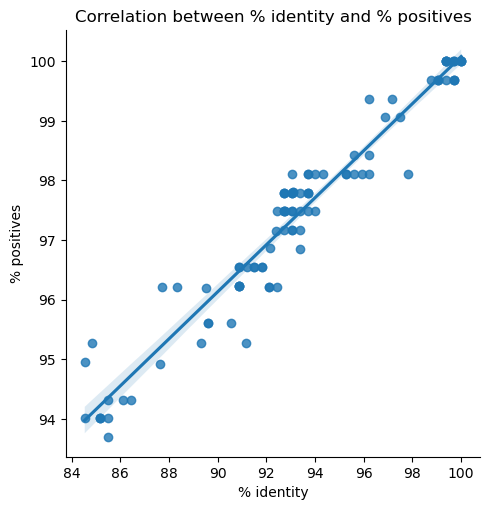

In [70]:
### Your code here . . .
sns.lmplot(
    data = df, 
    x = '% identity',
    y = '% positives'
)

plt.title("Correlation between % identity and % positives")
plt.show()


### Question  5
Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

In [77]:
### Your code here . . .
protein_df = pd.read_csv('https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv')
protein_df.drop(columns = 'Unnamed: 0', inplace = True)

merged_df = df.merge(protein_df, left_index = True, right_on = 'Protein', how = 'left')
merged_df.rename(columns={'Source': 'Protein source'}, inplace = True)
merged_df['Protein source'] = merged_df['Protein source'].fillna('NA')
merged_df.reset_index(drop = True, inplace=True)
merged_df


,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications,Protein,Protein source
0,100.000,318,0,0,1,318,1,318,0,629,100.00,1487,9.0,NP_904328.1,RefSeq
1,99.686,318,1,0,1,318,1,318,0,629,100.00,17947,47.0,AGK29621.1,NA
2,99.686,318,1,0,1,318,1,318,0,627,100.00,12106,13.0,YP_220563.1,GenPept
3,99.686,318,1,0,1,318,1,318,0,627,99.69,2319,41.0,ACM24502.1,NA
4,99.371,318,2,0,1,318,1,318,0,627,100.00,18964,3.0,AHG32084.1,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,92.767,318,23,0,1,318,1,318,0,551,97.48,17348,6.0,ABX45285.1,NA
96,93.375,317,21,0,1,317,1,317,0,551,96.85,7105,19.0,ASP44815.1,NA
97,84.543,317,49,0,1,317,1,317,0,551,94.01,18940,37.0,YP_009414156.1,GenPept
98,85.174,317,47,0,1,317,1,317,0,551,94.01,18762,5.0,YP_009414363.1,GenPept
